<a href="https://colab.research.google.com/github/alexdel1/HackGoogleAI/blob/main/R6_05TP_arbre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

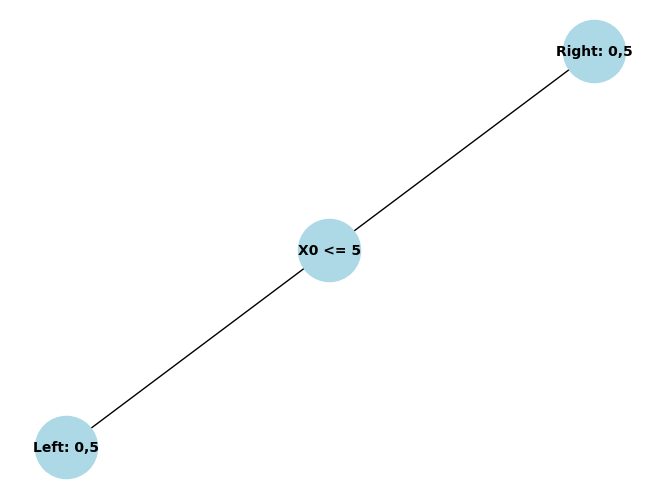

In [ ]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class CART:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1:  # Si toutes les étiquettes sont identiques
            return {'label': y[0]}

        if depth == self.max_depth:
            return {'label': np.bincount(y).argmax()}

        # Trouver la meilleure division
        best_gini = float('inf')
        best_split = None
        best_left_y = None
        best_right_y = None
        best_left_X = None
        best_right_X = None
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                left_y = y[left_mask]
                right_y = y[right_mask]

                gini = self._gini_index(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature, threshold)
                    best_left_y = left_y
                    best_right_y = right_y
                    best_left_X = X[left_mask]
                    best_right_X = X[right_mask]

        # Créer les sous-arbres gauche et droit
        left_tree = self._build_tree(best_left_X, best_left_y, depth + 1)
        right_tree = self._build_tree(best_right_X, best_right_y, depth + 1)

        return {
            'feature': best_split[0],
            'threshold': best_split[1],
            'left': left_tree,
            'right': right_tree
        }

    def _gini_index(self, left_y, right_y):
        def gini(y):
            proportions = np.bincount(y) / len(y)
            return 1 - np.sum(proportions ** 2)
        return (len(left_y) * gini(left_y) + len(right_y) * gini(right_y)) / (len(left_y) + len(right_y))

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if 'label' in tree:
            return tree['label']
        if sample[tree['feature']] <= tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

# Exemple d'utilisation simple
if __name__ == "__main__":
    # Exemple de données (2D pour simplification)
    X = np.array([[2, 3], [10, 15], [5, 5], [9, 9], [4, 6], [8, 8], [1, 2], [6, 7], [7, 8], [3, 4]])
    y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

    # Entraînement de l'arbre
    cart = CART(max_depth=2)
    cart.fit(X, y)

    # Affichage de l'arbre avec networkx
    G = nx.Graph()

    def add_edges(tree, parent=None, label=None):
        if 'label' in tree:
            G.add_node(label, label=tree['label'])
            if parent:
                G.add_edge(parent, label)
        else:
            current_node = f"X{tree['feature']} <= {tree['threshold']}"
            G.add_node(current_node)
            if parent:
                G.add_edge(parent, current_node)
            add_edges(tree['left'], parent=current_node, label=f"Left: {tree['feature']},{tree['threshold']}")
            add_edges(tree['right'], parent=current_node, label=f"Right: {tree['feature']},{tree['threshold']}")

    # Créer l'arbre sous forme de graph
    add_edges(cart.tree)

    # Dessiner l'arbre
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
    plt.show()

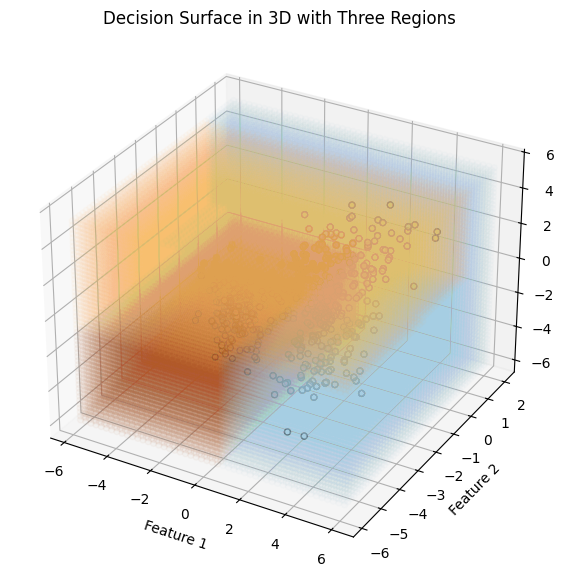

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

# Generate a 3D classification dataset with 3 features and 3 classes
X, y = make_classification(n_samples=500, n_features=3, n_classes=3,
                           n_informative=3, n_redundant=0, n_clusters_per_class=1,
                           class_sep=2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4)  # Use higher depth for more divisions
clf.fit(X, y)

# Create a 3D grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50),
                         np.linspace(z_min, z_max, 50))

# Predict for all grid points
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
predictions = clf.predict(grid_points)

# Reshape predictions to match the grid shape
predictions_reshaped = predictions.reshape(xx.shape)

# Plotting the decision boundaries in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface using colors for predictions
ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=predictions, cmap=plt.cm.Paired, alpha=0.03)

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)

# Label axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Decision Surface in 3D with Three Regions')

plt.show()

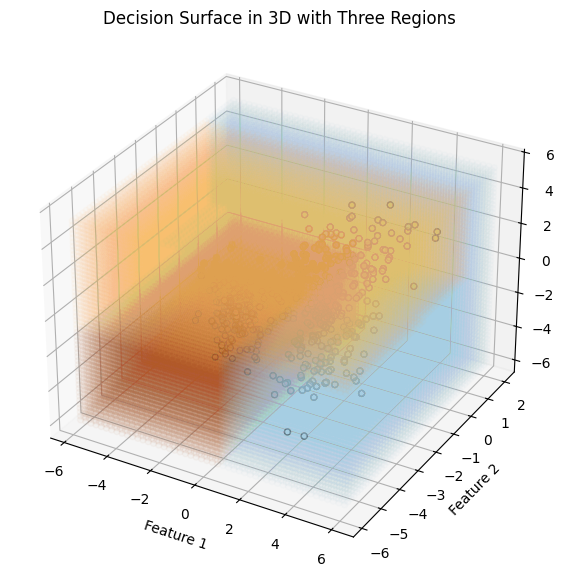

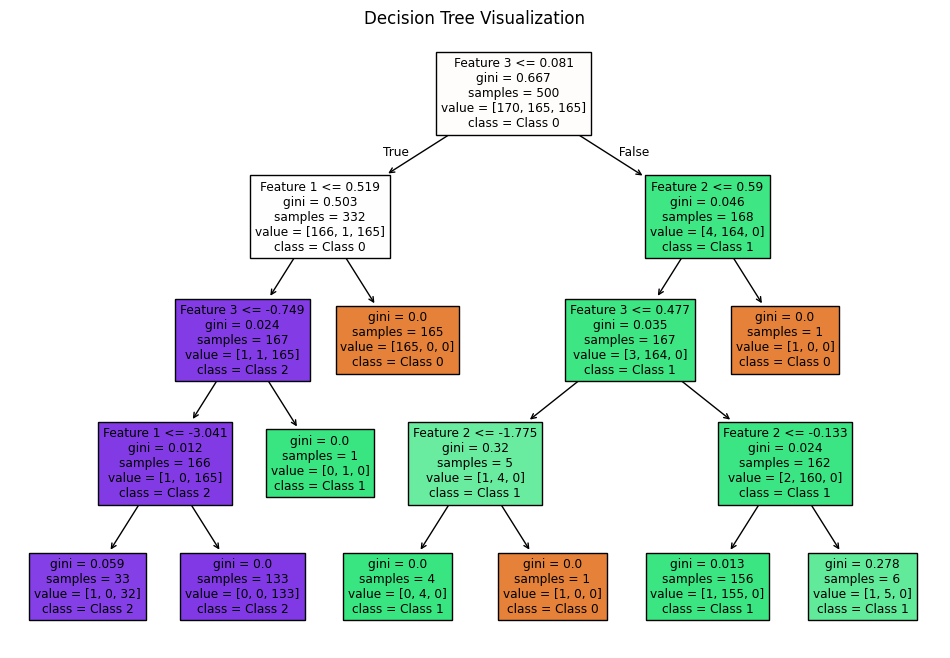

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mpl_toolkits.mplot3d import Axes3D

# Generate a 3D classification dataset with 3 features and 3 classes
X, y = make_classification(n_samples=500, n_features=3, n_classes=3,
                           n_informative=3, n_redundant=0, n_clusters_per_class=1,
                           class_sep=2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4)  # Use higher depth for more divisions
clf.fit(X, y)

# Create a 3D grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50),
                         np.linspace(z_min, z_max, 50))

# Predict for all grid points
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
predictions = clf.predict(grid_points)

# Reshape predictions to match the grid shape
predictions_reshaped = predictions.reshape(xx.shape)

# Plotting the decision boundaries in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface using colors for predictions
ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=predictions, cmap=plt.cm.Paired, alpha=0.03)

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)

# Label axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Decision Surface in 3D with Three Regions')

plt.show()

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, feature_names=['Feature 1', 'Feature 2', 'Feature 3'], class_names=['Class 0', 'Class 1', 'Class 2'], filled=True, ax=ax)
plt.title("Decision Tree Visualization")
plt.show()

$$
\text{err}(A^i_{n_f}) = \sum_{k=1}^{n_f} C(\mathcal{F(A^i_{n_f}})_k)
$$

Où :

*   $\text{err}(A^i_{n_f})$ : est l'erreur de l'arbre $A^i_{n_f}$ (i ème arbre avec $n_f$ feuilles) sur l'ensemble de test.
*   $n_f$ : est le nombre de feuilles de l'arbre $A^i_{n_f}$.
*   $C(\mathcal{F}_k)$ : est le coût (ou l'erreur) associé à la $k$-ième feuille $\mathcal{F}_k$.
*   $\sum_{k=1}^{n_f}$ : est la somme des coûts de toutes les $n_f$ feuilles de l'arbre $A^i_{n_f}$.

$$
\text{crit}_\alpha(A^i_{n_f}) = \text{err}(A^i_{n_f}) + \alpha n_f
$$

Une forêt aléatoire basée sur le bagging procède en trois étapes :

1.  **Bootstrap :** tirage aléatoire de $Q$ échantillons $\mathcal{L}_n^{\Theta_1}, \dots, \mathcal{L}_n^{\Theta_Q}$ chacun de taille $n$ en faisant un tirage *avec remise* dans l'échantillon initial $\mathcal{L}_n$.

2.  **CART :** pour chaque échantillon $\mathcal{L}_n^{\Theta_q}$, création d'un arbre aléatoire $\hat{h}(\cdot, \Theta_q)$ par la méthode *CART*.

3.  **Agrégation :** agrégation des Q prédicteurs (average / majority voting).

Étant donnés un $n$ échantillon d'entraînement $\mathcal{L}_n$ et une collection de $Q$ prédicteurs $(\hat{h}(\cdot, \Theta_1), \dots, \hat{h}(\cdot, \Theta_Q))$ dépendants de $Q$ variables aléatoires $(\Theta_1, \dots, \Theta_Q)$ indépendantes et de même loi (que nous définirons plus tard) et surtout indépendantes de $\mathcal{L}_n$, le prédicteur des forêts aléatoires (ou *random forest* en anglais) que nous notons $\hat{h}_{RF}$ est construit en agrégeant les $Q$ prédicteurs de la façon suivante pour tout $x \in \mathcal{X}$ :

*   **Régression :** la moyenne des prédictions

$$
    \hat{h}_{RF}(x) = \frac{1}{Q} \sum_{q=1}^{Q} \hat{h}(x, \Theta_q). \qquad
$$

*   **Classification :** le vote majoritaire des prédictions individuelles

$$
    \hat{h}_{RF}(x) \in \underset{1 \le k \le K}{\text{argmax}} \left[ \sum_{q=1}^{Q} \mathbb{1}_{\{\hat{h}(x, \Theta_q) = k\}} \right]. \qquad
$$

# Importance des variables

La procédure consiste à prendre les $Q$ échantillons $L_n^{\Theta_q}$ et prendre pour chacun :

- Nous notons $L_n^{\Theta^c}$ l'échantillon complémentaire de l'échantillon (out of the bag).

- Nous construisons l'arbre $\hat{h}(\cdot, \Theta_q, \Theta'_q)$ à l'aide de l'échantillon $L_n^{\Theta_q}$ une unique fois.

- Nous testons l'erreur de prédiction sur l'échantillon complémentaire $L_n^{\Theta^c}$. Nous notons $\text{errOOB}_q$ cette erreur.

- Pour chaque variable $j$, nous permutons les valeurs au sein de la variable $j$ dans l'échantillon complémentaire $L_n^{\Theta^c}$ uniquement. Nous utilisons le même arbre $\hat{h}(\cdot, \Theta_q, \Theta'_q)$ construit précédemment pour tester sur cet échantillon complémentaire permuté. Nous notons $\text{errOOB}_q^j$ cette erreur.

Au final, l'importance de la variable, noté $\text{VI}(X_{\cdot j})$ calcule à quel point l'erreur de l'arbre est pire avec les valeurs permutées ou pas :

$$\text{VI}(X_{\cdot j}) = \frac{1}{Q} \sum_{q=1}^Q (\text{errOOB}_q^j - \text{errOOB}_q)$$

### Notations adaptées pour permutation_importance
1. $\hat{f}(\cdot)$ : Le modèle prédictif (quel qu'il soit, déjà entraîné).
2. $ L_{\text{test}} $ : L'ensemble de test ou de validation (fixe et indépendant).
3. $ \text{err}_{\text{base}} $ : L'erreur sur l'ensemble $ L_{\text{test}} $ sans permutation.
4. $ \text{err}_{\text{perm}}^j $ : L'erreur sur $ L_{\text{test}} $ après permutation des valeurs de la variable $ X_j $.

---

### Méthode pour importance par permutation
1. **Calcul de l'erreur de base** : Tester le modèle $\hat{f}(\cdot)$ sur $ L_{\text{test}} $ pour obtenir $\text{err}_{\text{base}}$.
2. **Permutation** : Pour chaque variable $ X_j $, permuter aléatoirement les valeurs de $ X_j $ dans $ L_{\text{test}} $, tout en laissant les autres variables inchangées.
3. **Calcul de l'erreur permutée** : Tester $\hat{f}(\cdot)$ sur les données avec $ X_j $ permutée pour obtenir $\text{err}_{\text{perm}}^j$.
4. **Importance de la variable** : Calculer $ \text{VI}(X_j) = \text{err}_{\text{perm}}^j - \text{err}_{\text{base}} $.

Si la permutation augmente significativement l'erreur, la variable est considérée comme importante.

---

Cela permet de mesurer l'importance d'une variable dans un modèle sans se soucier des spécificités du modèle lui-même (par exemple, les forêts aléatoires ou les arbres de décision).

Erreur *Out Of Bag* (ou OOB)

L'erreur OOB (pour *Out Of Bag*) consiste à prendre pour chaque individu $i$ tous les prédicteurs construits sans utiliser le couple $(X_i, Y_i)$ et proposer une prédiction $\hat{Y}_i$, et de calculer l'erreur :

*   **Régression :**

    $$
    \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2.
    $$

*   **Classification :**

    $$
    \frac{1}{n} \sum_{i=1}^{n} \mathbb{1}_{\{Y_i \neq \hat{Y}_i\}}.
    $$

### Théorème  Consistance des forêts aléatoires - Scornet et al., 2015

Sous certaines hypothèses sur le modèle de régression, si les conditions suivantes sont remplies :

1. Le nombre d'arbres tend vers l'infini.
2. Le nombre $ a_n $ de points dans chaque arbre tend vers l'infini.
3. Le nombre $ t_n $ de feuilles tend également vers l'infini, mais pas trop rapidement, car il faut respecter la condition :

$$
t_n (\log n)^9 a_n^{-1} \xrightarrow[n \to +\infty]{} 0
$$

Alors l'estimateur obtenu par les forêts aléatoires de Breiman est consistant.

### Fonction d'erreur exponentielle
$$
E = \sum_{n=1}^N \exp\left(-t_n f_m(x_n)\right)
$$

- $E$ : erreur totale.
- $N$ : nombre total d'exemples d'entraînement.
- $t_n \in \{-1, 1\}$ : étiquette réelle associée à l'exemple $n$.
- $f_m(x_n)$ : sortie du classifieur combiné pour l'exemple $n$.

---

### Classifieur combiné
$$
f_m(x) = \frac{1}{2} \sum_{l=1}^m \alpha_l y_l(x)
$$

- $f_m(x)$ : sortie du classifieur combiné (poids et votes des classifieurs de base).
- $m$ : nombre de classifieurs de base utilisés.
- $\alpha_l$ : poids du $l$-ième classifieur de base.
- $y_l(x)$ : sortie du $l$-ième classifieur de base pour l'entrée $x$.

### Remarque
L'objectif est de minimiser $E$ en ajustant les poids $\alpha_l$ et les paramètres des classifieurs de base $y_l(x)$.

1. Initialiser les coefficients de pondération des données $\{w_n\}$ en définissant $w_n^{(1)} = 1 / N$ pour $n = 1, \dots, N$.

2. Pour $m = 1, \dots, M$ :

   (a) Ajuster un classifieur $y_m(x)$ aux données d'entraînement en minimisant la fonction d'erreur pondérée :  
   $$
   J_m = \sum_{n=1}^N w_n^{(m)} I\left(y_m(x_n) \neq t_n\right)
   $$
   où $I\left(y_m(x_n) \neq t_n\right)$ est une fonction indicatrice qui vaut $1$ lorsque $y_m(x_n) \neq t_n$ et $0$ sinon.

   (b) Évaluer les quantités :  
   $$
   \epsilon_m = \frac{\sum_{n=1}^N w_n^{(m)} I\left(y_m(x_n) \neq t_n\right)}{\sum_{n=1}^N w_n^{(m)}}
   $$
   et utiliser ces valeurs pour calculer :  
   $$
   \alpha_m = \ln\left(\frac{1 - \epsilon_m}{\epsilon_m}\right).
   $$

   (c) Mettre à jour les coefficients de pondération des données :  
   $$
   w_n^{(m+1)} = w_n^{(m)} \exp\left(\alpha_m I\left(y_m(x_n) \neq t_n\right)\right).
   $$

3. Faire des prédictions à l’aide du modèle final, qui est donné par :  
$$
Y_M(x) = \text{sign}\left(\sum_{m=1}^M \alpha_m y_m(x)\right).
$$

SyntaxError: invalid syntax (<ipython-input-1-bb2608449d78>, line 1)



# Algorithme XGBoost Non Régularisé

**Entrées :**
- Ensemble d'entraînement $\lbrace (x_i, y_i) \rbrace_{i=1}^{N}$
- Fonction de perte différentiable $L(y, F(x))$
- Nombre de modèles faibles $M$
- Taux d'apprentissage $α$

**Algorithme :**

1. **Initialisation** du modèle avec une valeur constante :
$$
f^{(0)}(x) = \underset{θ}{\text{argmin}} \sum_{i=1}^{N} L(y_i, θ)
$$
*Explication :* Cette étape initialise le modèle avec une prédiction constante. On cherche la valeur $θ$ qui minimise la fonction de perte $L$ sur l'ensemble des données d'entraînement. En d'autres termes, on trouve la "meilleure" prédiction constante possible avant de commencer à construire les arbres. Par exemple, si $L$ est l'erreur quadratique moyenne, $θ$ sera la moyenne des $y_i$.

2. **Pour** $m = 1$ jusqu'à $M$ :

a) Calcul des gradients et hessiennes :
$$
g_m(x_i) = \left[\frac{∂L(y_i, f(x))}{∂f(x)}\right]_{f(x)=f^{(m-1)}(x)}
$$
$$
h_m(x_i) = \left[\frac{∂^2L(y_i, f(x))}{∂f(x)^2}\right]_{f(x)=f^{(m-1)}(x)}
$$
b) Entraînement d'un modèle faible (arbre) sur $\lbrace (x_i, g_m(x_i), h_m(x_i)) \rbrace_{i=1}^{N}$ en résolvant le problème d'optimisation suivant :$$
ϕ_m = \underset{ϕ∈Φ}{\text{argmin}} \sum_{i=1}^{N} \frac{1}{2} h_m(x_i) \left[ϕ(x_i) - \frac{g_m(x_i)}{h_m(x_i)}\right]^2
f_m(x) = αϕ_m(x)
$$
c) Mise à jour du modèle :
$$
f^{(m)}(x) = f^{(m-1)}(x) + f_m(x)
$$
3. **Sortie :**
$$
f(x) = f^{(M)}(x) = \sum_{m=0}^{M} f_m(x)
$$

θ<sub>t+1</sub> = θ<sub>t</sub> - η * ∇<sub>θ</sub>J(θ<sub>t</sub>; x<sup>(i)</sup>; y<sup>(i)</sup>)